In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mdates

In [4]:
df = pd.read_json('13-06.json')

df.drop(['id','hasRoute', 'isVisible','imported','routeFromFile','unitSpeed'], axis=1, inplace=True)
df.drop(df.index[-1], inplace=True)

print(np.shape(df))
print(df.columns)

(54, 7)
Index(['date', 'dateEnd', 'km', 'sAverage', 'name', 'listValueRoute',
       'listSprintValue'],
      dtype='object')


In [5]:
# prev_date = datetime.fromtimestamp(df.iloc[-1]['listValueRoute'][0]['date'] / 1000)

# ids = []
# ids.append(df.iloc[-1]['listValueRoute'][0]['id_route'])
# for x in df.iloc[-1]['listValueRoute']:
#     normal_date = datetime.fromtimestamp(x['date'] / 1000)

#     if(normal_date - prev_date > timedelta(hours=1)):
#         ids.append(x['id_route'])

#     prev_date = normal_date

# groups = []
# new_dates = []
# for i, _ in enumerate(ids):
#     group = []
#     for x in df.iloc[-1]['listValueRoute']:
#         if(x['id_route'] == ids[i]):
#             new_dates.append(datetime.fromtimestamp(x['date'] / 1000))
            
#         if(i+1 != len(ids)):
#             if(x['id_route'] >= ids[i] and x['id_route'] < ids[i+1]):
#                 group.append(x)
#         else:
#             group.append(x)

#     groups.append(group)



In [6]:
def plot_speed(date, speed):

    plt.plot(date, speed)

    title_date = date[0].strftime('Speed - %d of %B %Y')
    plt.title(title_date)

    dtFmt = mdates.DateFormatter('%H:%M')

    plt.gca().xaxis.set_major_formatter(dtFmt)
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=60))
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(25))
    plt.xticks(rotation=60, fontweight='light')

In [7]:
speed = []
date = []
for x in range(len(df)):
    speed_aux = []
    date_aux = []
    for i, line in enumerate(df.iloc[x]['listValueRoute']):
        normal_date = datetime.fromtimestamp(line['date'] / 1000).strftime('%Y-%m-%d %H:%M:%S')

        date_aux.append(normal_date)
        speed_aux.append(line['speedGPS'])
    if(speed_aux != []):
        date_aux = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in date_aux]
        speed.append(speed_aux)
        date.append(date_aux)
        # plot_speed(date_aux, speed_aux)

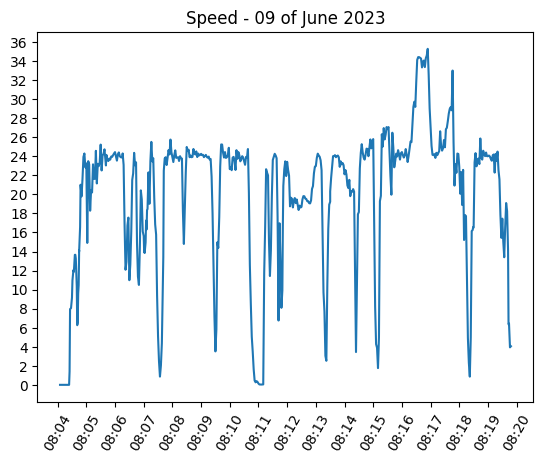

In [8]:
plot_speed(date[-1], speed[-1])

In [9]:
import Counter

Counter(df['date'])

ModuleNotFoundError: No module named 'Counter'